In [36]:
# importando o matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
cm = 1/2.54  # centimeters in inches
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
import numpy as np 
import pandas as pd

# Questão #1
Enunciado  
Crie um array x com 200 pontos, começando de -10 até 10. Depois calcule as seguintes funções sobre esse array:  
  
y1 = sen(x) / x  
y2 = 1 / (1-e^(-x))  
  
Por fim, plot essas duas funções, em função do x, ambas em uma mesma figura, porém, em dois axes distintos (um abaixo do outro).  

In [37]:
x = np.linspace(-10,10,200)

In [38]:
y1 = np.sin(x) / x

In [39]:
y2 = 1 / (1-np.e**(-x))

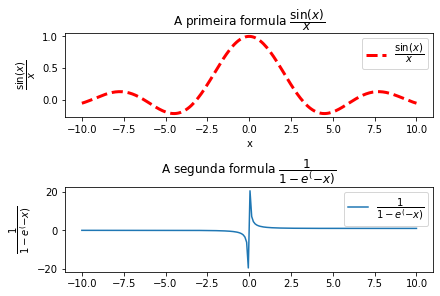

In [40]:
fig, ax = plt.subplots(2, constrained_layout=True)  # Create a figure and an axes.
ax[0].plot(x, y1,label=r'$\dfrac{\sin(x)}{x}$', color='red', ls='--', lw='3')  # Plot more data on the axes...
ax[1].plot(x, y2,label=r'$\dfrac{1}{1-e^(-x)}$')  # Plot more data on the axes...
ax[0].set_xlabel('x')  # Add an x-label to the axes.
ax[0].set_ylabel(r'$\dfrac{\sin(x)}{x}$')  # Add a y-label to the axes.
ax[1].set_ylabel(r'$\dfrac{1}{1-e^(-x)}$')  # Add a y-label to the axes.
ax[0].set_title(r'A primeira formula $\dfrac{\sin(x)}{x}$')  # Add a title to the axes.
ax[1].set_title(r'A segunda formula $\dfrac{1}{1-e^(-x)}$')  # Add a title to the axes.
ax[1].legend(loc=0)
ax[0].legend(loc=0)  # Add a legend.

In [41]:
y2 = 1 / (1-np.e**(-x))

# Questão 2
Enunciado
Carregue o arquivo avocado.csv e, em seguida, siga as instruções abaixo:

- (a) Obtenha apenas os dados desse dataset que são referentes à região da Califórnia (California), no ano de 2017; e salva-os em um novo dataframe.
- (b) A partir do dataframe obtido no item (a), obtenha apenas os dados referentes à abacates do tipo convencional; em seguida, salve em um novo dataframe.
- (c) Utilizando o dataframe salvo no item (b), crie um gráfico de linha que apresente a variação do preço médio do abacate ao longo do ano de 2017 (datas) na região da Califórnia.
- (d) Utilizando o dataframe salvo no item (a), crie um gráfico de pizza que apresente o percentual do volume total de abacates vendidos para cada tipo: convencional e orgânico.


In [42]:
df_avocado = pd.read_csv('../datasets/avocado.csv')
df_avocado['Date'] = pd.to_datetime(df_avocado.Date)

In [43]:
df_california_2017 = df_avocado[(df_avocado['region'] == 'California') & (df_avocado['year']==2017)]

In [44]:
df_conventional = df_california_2017[df_california_2017['type']=='conventional']

In [45]:
df_california_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 5934 to 15111
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          106 non-null    datetime64[ns]
 1   AveragePrice  106 non-null    float64       
 2   Total Volume  106 non-null    float64       
 3   year          106 non-null    int64         
 4   region        106 non-null    object        
 5   type          106 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 5.0+ KB


In [46]:
df_california_2017['Date'].unique()

array(['2017-12-31T00:00:00.000000000', '2017-12-24T00:00:00.000000000',
       '2017-12-17T00:00:00.000000000', '2017-12-10T00:00:00.000000000',
       '2017-12-03T00:00:00.000000000', '2017-11-26T00:00:00.000000000',
       '2017-11-19T00:00:00.000000000', '2017-11-12T00:00:00.000000000',
       '2017-11-05T00:00:00.000000000', '2017-10-29T00:00:00.000000000',
       '2017-10-22T00:00:00.000000000', '2017-10-15T00:00:00.000000000',
       '2017-10-08T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-09-24T00:00:00.000000000', '2017-09-17T00:00:00.000000000',
       '2017-09-10T00:00:00.000000000', '2017-09-03T00:00:00.000000000',
       '2017-08-27T00:00:00.000000000', '2017-08-20T00:00:00.000000000',
       '2017-08-13T00:00:00.000000000', '2017-08-06T00:00:00.000000000',
       '2017-07-30T00:00:00.000000000', '2017-07-23T00:00:00.000000000',
       '2017-07-16T00:00:00.000000000', '2017-07-09T00:00:00.000000000',
       '2017-07-02T00:00:00.000000000', '2017-06-25

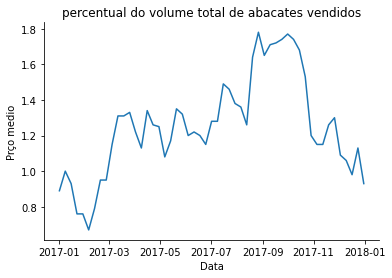

In [57]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(df_conventional['Date'].values, df_conventional['AveragePrice'].values)  # Plot more data on the axes...
ax.set_xlabel('Data')  # Add an x-label to the axes.
ax.set_ylabel('Prço medio')  # Add a y-label to the axes.
ax.set_title("percentual do volume total de abacates vendidos")  # Add a title to the axes.

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [76]:
df_california_2017['type'].value_counts(normalize=True)

organic         0.5
conventional    0.5
Name: type, dtype: float64

In [77]:
df_california_2017['type'].value_counts()

organic         53
conventional    53
Name: type, dtype: int64

Text(0.5, 1.0, 'Percentual do volume total de abacates vendidos')

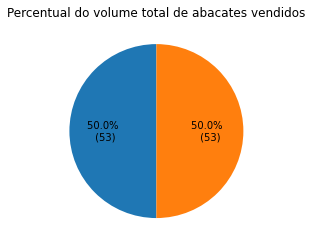

In [91]:
fig, ax = plt.subplots()  # Create a figure and an axes.
dfPie = df_california_2017.groupby('type')['Total Volume'].count()
ax.pie(dfPie, startangle=90, autopct=lambda p : '{:.1f}% \n ({:,.0f})'.format(p,p * sum(dfPie)/100))  # Plotar pizza.
ax.set_title("Percentual do volume total de abacates vendidos")  # Add a title to the axes.

# Questão #3
Enunciado  
Carregue o dataset contido no arquivo cholera-dataset.csv em um objeto DataFrame.    
Esse dataset contém dados referentes ao número de casos reportados de cólera em cada país,    
desde 1950 até 2016, além do número de mortes provocadas pela cólera; dentre outras informações.  
  
Após carregar esse dataset, obtenha:  
  
a) Apenas os dados da Índia.  
b) Crie um gráfico de barras que apresente o número de casos reportados e de mortes causadas pela cólera na Índia, ambos em um mesmo axes, em função do ano. 

In [142]:
df_cholera = pd.read_csv('../datasets/cholera-dataset.csv')

In [143]:
df_cholera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 2341 non-null   object 
 1   Year                                    2341 non-null   int64  
 2   Number of reported cases of cholera     2341 non-null   float64
 3   Number of reported deaths from cholera  2341 non-null   float64
 4   Cholera case fatality rate              2341 non-null   float64
 5   WHO Region                              2341 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 91.5+ KB


In [144]:
df_cholera.isnull().sum()

Country                                   0
Year                                      0
Number of reported cases of cholera       0
Number of reported deaths from cholera    0
Cholera case fatality rate                0
WHO Region                                0
dtype: int64

In [148]:
df_cholera_india = df_cholera[df_cholera.Country == 'India']

In [149]:
df_cholera_india.head(3)

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
862,India,2016,841.0,3.0,0.4,South-East Asia
863,India,2015,889.0,4.0,0.4,South-East Asia
864,India,2014,4031.0,21.0,0.5,South-East Asia


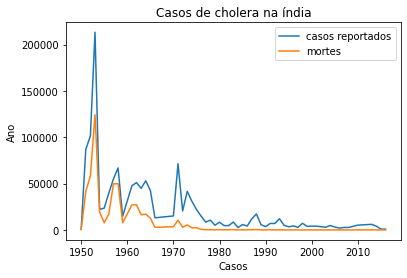

In [153]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(df_cholera_india['Year'], df_cholera_india['Number of reported cases of cholera'],label='casos reportados')  # Plot more data on the axes...
ax.plot(df_cholera_india['Year'], df_cholera_india['Number of reported deaths from cholera'],label=r'mortes')  # Plot more data on the axes...
ax.set_xlabel('Casos')  # Add an x-label to the axes.
ax.set_ylabel('Ano')  # Add a y-label to the axes.
ax.set_title(r'Casos de cholera na índia')  # Add a title to the axes.
ax.legend(loc=0)
ax.legend(loc=0)  # Add a legend.

# Questão #4
Enunciado   
Carregue os dados do arquivo googleplaystore.csv e, em seguida:  

a) Crie um gráfico de pizza que apresente o percentual dos gêneros (Genres) dos aplicativos. Como existem muitos gêneros, considere apenas os 10 primeiros.  
b) Crie um gráfico de barras que contenha a quantidade de aplicativos que foram desenvolvidos para cada versão específica (ou conjunto de versões) do Android, especificadas na coluna Android Ver.

In [155]:
df_googleplaystore = pd.read_csv('../datasets/googleplaystore.csv')

In [156]:
df_googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [215]:
top10Apps = df_googleplaystore.groupby(['Genres']).size().sort_values(ascending=False).nlargest(10)


In [217]:
top10Apps

Genres
Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
dtype: int64

In [222]:
df_googleplaystore['Genres'].value_counts()[:10]


Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

In [223]:
df_googleplaystore['Genres'].value_counts().nlargest(10)

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Percentual do volume total de abacates vendidos')

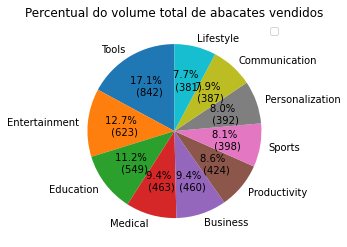

In [225]:
fig, ax = plt.subplots()  # Create a figure and an axes.
dfPie = top10Apps.copy()
ax.legend(loc=0)
ax.pie(dfPie, startangle=90, labels=dfPie.index, autopct=lambda p : '{:.1f}% \n ({:,.0f})'.format(p,p * sum(dfPie)/100))  # Plotar pizza.
ax.set_title("Percentual do volume total de abacates vendidos")  # Add a title to the axes.

# Questão #5
Enunciado  
Carregue o arquivo houses_to_rent.csv. Em seguida:  
  
a) Crie um gráfico de dispersão para visualizar uma relação entre a área e o preço total do aluguel do imóvel.  
b) Visualize os outliers presentes na coluna da área utilizando o boxplot.  
c) Faça o mesmo que foi solicitado no item anterior, porém, para a coluna do preço total do aluguel.  
d) Elimine os outliers de ambas as colunas utilizando o método quantile.   
e) Crie novamente um gráfico de dispersão dos dados da área e preço total do aluguel do imóvel; dessa vez,   após a remoção dos outliers de ambas as colunas.


In [227]:
df_houses_to_rent = pd.read_csv('../datasets/houses_to_rent.csv')


In [228]:
df_houses_to_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 918.9+ KB


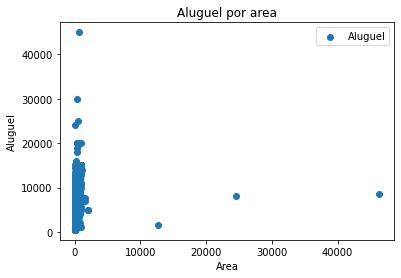

In [233]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.scatter(df_houses_to_rent['area'], df_houses_to_rent['rent amount (R$)'], label='Aluguel')  # 
ax.set_xlabel('Area')  # Add an x-label to the axes.
ax.set_ylabel('Aluguel')  # Add a y-label to the axes.
ax.set_title(r'Aluguel por area')  # Add a title to the axes.
ax.legend(loc=0)  # Add a legend.

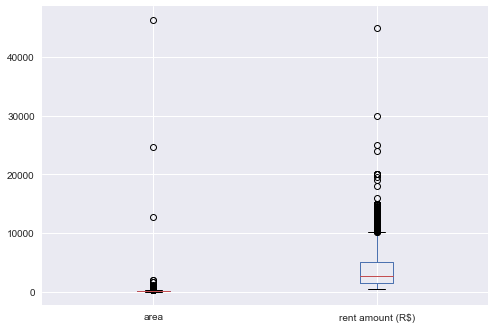

In [286]:

df_houses_to_rent[['area','rent amount (R$)']]
df_houses_to_rent[['area','rent amount (R$)']].plot(kind='box')
plt.show()